In [3]:
import pandas as pd    ##제목이랑 그래프 타이틀 붙이기
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 정팔각형 5층 d=7mm(최솟값) 총 높이 140.4mm 벽 두께 0.6mm 액추에이터

최대 수축률: 85.47%


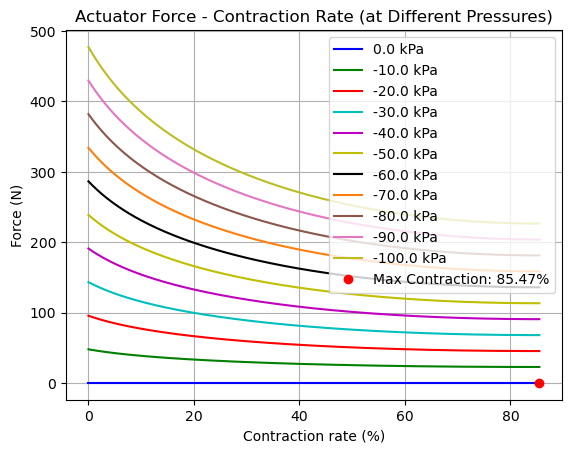

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 초기값 설정
theta = np.linspace(np.pi/180*60, 0, 1000)  # 각도 범위
initialheight = 140.4*10**-3
initialangle = np.pi/3
n = 5
h = 24*10**-3
D = 27*10**-3
d = 7*10**-3
s = 3.4*10**-3
R = 20.787*10**-3
L0 = h/np.sin(initialangle)
q = 1/2*L0*np.cos(initialangle)

# 함수 정의
L = L0 * np.sin(theta)
L_t = (n * L + (n + 1) * s)
dL = L0 * np.cos(theta)
dL_t = n * dL
V = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.sin(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * np.cos(theta) * np.sin(theta) + 2 * (n - 1) * (1 + 2 ** 0.5) * R ** 2 * s  ## 액추에이터 전체 부피
dV = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.cos(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * (np.cos(theta) ** 2 - np.sin(theta) ** 2)

# 압력과 힘 배열 선언
P = [0] * 11
F = [0] * 11

# 압력과 힘 계산
for i in range(0, 11):
    P[i] = -10 * i * 10 ** 3  # 압력 값 (Pa)
    F[i] = -P[i] * dV / dL_t

# 압력이 0, 10, 20, ..., 100 kPa일 때 액추에이터 힘 - 수축률 그래프
contraction_rate = (1 - L_t / L_t[0]) * 100
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:brown', 'tab:pink', 'tab:olive']
for i in range(0, 11):
    plt.plot(contraction_rate, F[i], '-', color=colors[i], label=str(P[i] / 10 ** 3) + ' kPa')

# 최대 수축률 계산
max_index = np.argmax(contraction_rate)  # 최대 수축률의 인덱스
max_contraction = contraction_rate[max_index]

# 최대 수축률에 대한 그래프 표시
plt.plot(max_contraction, F[0][max_index], 'ro', label=f'Max Contraction: {max_contraction:.2f}%')

# 축 레이블 및 범례 설정
plt.xlabel('Contraction rate (%)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

# 그래프 제목 설정
plt.title('Actuator Force - Contraction Rate (at Different Pressures)')

# 최대 수축률 출력
print(f'최대 수축률: {max_contraction:.2f}%')

# 그래프 표시
plt.show()




# 인벤터, 우리 모델, 논문 모델의 부피 비교 및 오차율 계산

L = 0.024m / contraction ratio: 0.0%
The contraction ratio exceeds the permissible range. / contraction ratio: 42.264973081037425%
The contraction ratio exceeds the permissible range. / contraction ratio: 97.98476968908552%
----------60 degrees angle Initial state ---------- 
inventor model volume is 69418.308mm^3
our model volume is 69418.30826906153mm^3 ---- our model error = 3.875944685604479e-07%
research model volume is 57443.502297175924mm^3 ---- research model error = 17.250212584876138%
----------30 degrees angle Initial state ---------- 
inventor model volume is 33486.336mm^3
our model volume is 33713.636273808566mm^3 ---- our model error = 0.6787851433150625%
research model volume is 41387.440030677906mm^3 ---- research model error = 23.595009112606117%
----------1 degrees angle Initial state ---------- 
inventor model volume is 1092.99mm^3
our model volume is 1095.5405192741405mm^3 ---- our model error = 0.2333524802734215%
research model volume is 3090.475898958084mm^3 ----

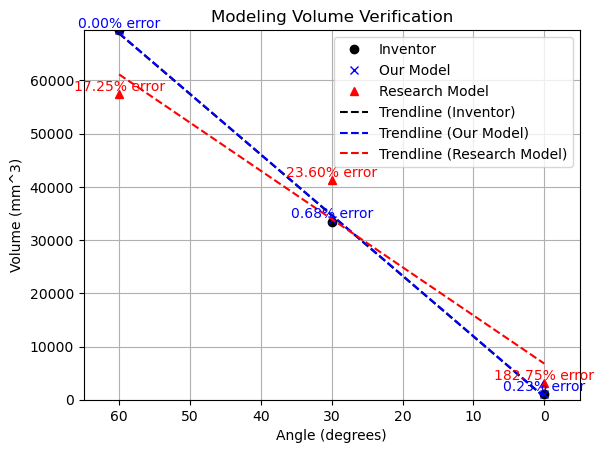

In [5]:
# 인벤터 부피랑 우리 모델, 논문 모델의 부피 계산하기 (층 한 개의 부피만 계산)
V_re = np.zeros(3) 
V_ou = np.zeros(3) 
V_in = [69418.308, 33486.336, 1092.990]  ## 인벤터 iproperties에서 가져온 부피 ## mm^3 단위

nowAngle = [np.pi/180*60, np.pi/180*30, np.pi/180*1]  ## 각각 60도, 30도, 1도
DegreeAngle = [60, 30, 1]
alpha = np.zeros(3) ## 논문에서 사용하는 자체 각도
L_re = np.zeros(3) ## 논문에서 사용하는 높이

for i in range(0,3):
    alpha[i] = np.pi - 2*nowAngle[i]  ## 논문에서 사용하는 자체 각도와 우리가 쓰는 각도와의 관계식
    V_ou[i] = (2*(1+2**0.5)*D**2*L0*np.sin(nowAngle[i])-2/3*(2*D+d+q)*L0**2*np.cos(nowAngle[i])*np.sin(nowAngle[i]))*10**9  ## 우리 모델의 부피 식
    
    # 논문 부피의 수식 허용 범위 계산
    L_re[i] = L0*np.sin(nowAngle[i]) ##논문에서 사용하는 길이
    Lh = (L0 - L_re[i]/2*np.pi)/2  ##논문에서 사용한 링에 붙는 벽면의 길이
    if 100 - L_re[i]/L_re[0]*100 < 36.34:  ## 수축률이 36.34%보다 낮으면 이 식을 사용
        V_re[i] = (2*D**2*L0*(1+2**0.5)*np.sin(alpha[i])/(alpha[i]) - 2*D*L0**2/(alpha[i])*(1-np.sin(alpha[i])*np.cos(alpha[i])/(alpha[i])))*10**9  ## 논문에서 사용한 부피 식
        print('L = ' + str(L_re[i]) + 'm / contraction ratio: ' + str(100 - L_re[i]/L_re[0]*100) + '%')
    else:  ## 수축률이 36.34%보다 높으면 이 식을 사용
        V_re[i] = (2*D**2*L_re[i]*(1+2**0.5)-(L_re[i]**2*D*np.pi-8*L_re[i]*Lh*D))*10**9
        print('The contraction ratio exceeds the permissible range. / contraction ratio: ' + str(100 - L_re[i]/L_re[0]*100) + '%')




# 인벤터의 모델과 우리 모델, 논문 모델의 부피 비교 및 오차율 계산
for i in range(0,3):
    print("----------"+str(DegreeAngle[i])+ " degrees angle Initial state ---------- ")
    print("inventor model volume is " + str(V_in[i]) + "mm^3" )
    print("our model volume is " + str(V_ou[i]) + "mm^3" + " ---- our model error = " + str(abs(V_in[i]-V_ou[i])/V_in[i]*100) + "%")
    print("research model volume is " + str(V_re[i]) + "mm^3"+ " ---- research model error = " + str(abs(V_in[i]-V_re[i])/V_in[i]*100) + "%")


# 데이터 설정
angles = [60, 30, 0]  # 각도

# 그래프 그리기 (다른 마커 스타일로 표시)
plt.plot(angles, V_in, 'o', color='black', label='Inventor')  # 파란색 원형 마커
plt.plot(angles, V_ou, 'x', color='blue', label='Our Model')  # 주황색 x 마커
plt.plot(angles, V_re, '^', color='red', label='Research Model')  # 초록색 세모 마커

# 추세선 그리기
coefficients_in = np.polyfit(angles, V_in, 1)
trendline_in = np.polyval(coefficients_in, angles)
plt.plot(angles, trendline_in, 'k--', label='Trendline (Inventor)')

coefficients_ou = np.polyfit(angles, V_ou, 1)
trendline_ou = np.polyval(coefficients_ou, angles)
plt.plot(angles, trendline_ou, 'b--', label='Trendline (Our Model)')

coefficients_re = np.polyfit(angles, V_re, 1)
trendline_re = np.polyval(coefficients_re, angles)
plt.plot(angles, trendline_re, 'r--', label='Trendline (Research Model)')

# 오차율 표시
for i in range(len(angles)):
    plt.text(angles[i], V_re[i], f'{abs(V_in[i]-V_re[i])/V_in[i]*100:.2f}% error', ha='center', va='bottom', color='red')
    plt.text(angles[i], V_ou[i], f'{abs(V_in[i]-V_ou[i])/V_in[i]*100:.2f}% error', ha='center', va='bottom', color='blue')

# 축 및 범례 설정
plt.xlabel('Angle (degrees)')
plt.ylabel('Volume (mm^3)')
plt.title('Modeling Volume Verification')
plt.legend()

# x축 뒤집기
plt.xlim(max(angles) + 5, min(angles) - 5)  # x축 여유 공간 추가
plt.ylim(0, max(max(V_in), max(V_ou), max(V_re)) + 50)  # y축 여유 공간 추가

# 그래프 표시
plt.grid(True)
plt.show()


# 

# 층 개수에 따른 힘 변화

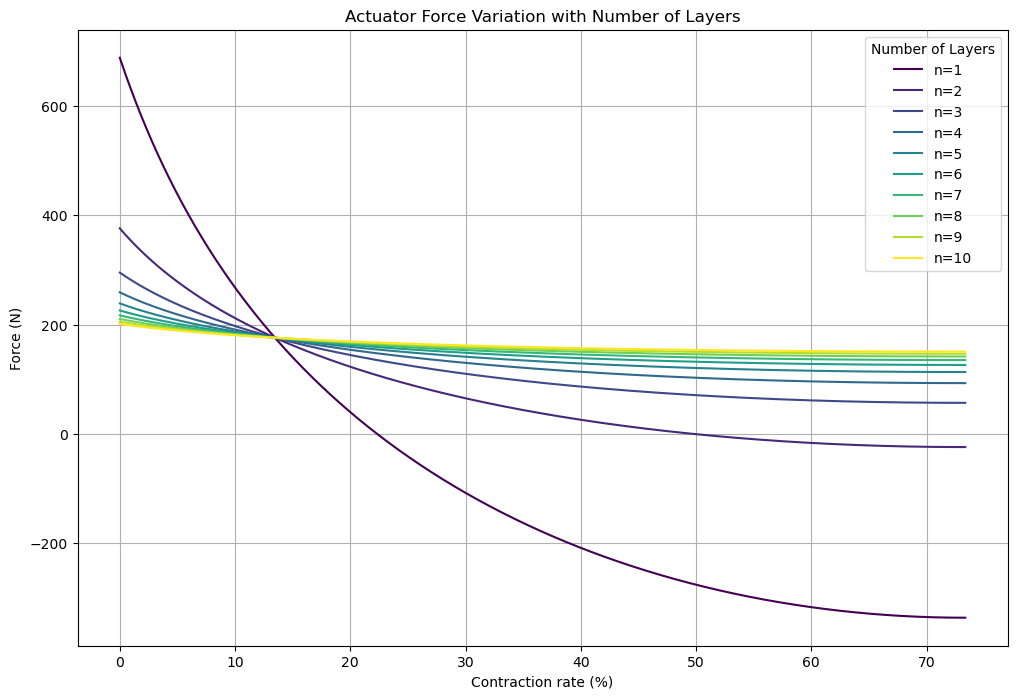

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 초기값 설정
theta = np.linspace(np.pi/180*60, 0, 1000)  # 각도 범위
initialheight = 140.4*10**-3
initialangle = np.pi/3
D = 27*10**-3
d = 7*10**-3
s = 3.4*10**-3
R = 20.787*10**-3

# 압력과 힘 배열 선언
P = [-50000] * 10
F = [0] * 10

# 압력과 힘 계산
for i in range(10):
    n = i + 1
    h = (initialheight-(n+1)*s)/n
    L0 = h/np.sin(initialangle)
    q = 1/2*L0*np.cos(initialangle)

    L = L0 * np.sin(theta)
    L_t = (n * L + (n + 1) * s)
    dL = L0 * np.cos(theta)
    dL_t = n * dL
    V = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.sin(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * np.cos(theta) * np.sin(theta) + 2 * (n - 1) * (1 + 2 ** 0.5) * R ** 2 * s
    dV = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.cos(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * (np.cos(theta) ** 2 - np.sin(theta) ** 2)
    F[i] = -P[i] * dV / dL_t

# 수축률 계산
contraction_rate = (1 - L_t / L_t[0]) * 100

# 힘-수축률 그래프 표시
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, 10))
for i in range(10):
    plt.plot(contraction_rate, F[i], '-', color=colors[i], label=f'n={i+1}')

# 축 레이블 및 범례 설정
plt.xlabel('Contraction rate (%)')
plt.ylabel('Force (N)')
plt.legend(title='Number of Layers')

# 격자 추가
plt.grid(True)

# 그래프 제목 설정
plt.title('Actuator Force Variation with Number of Layers')

# 그래프 표시
plt.show()


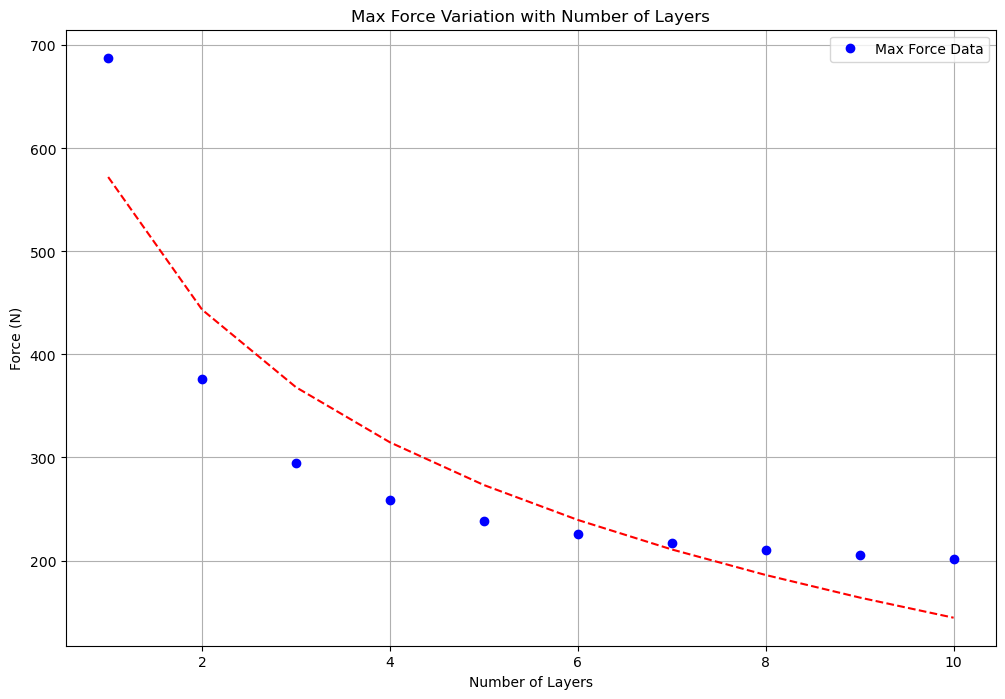

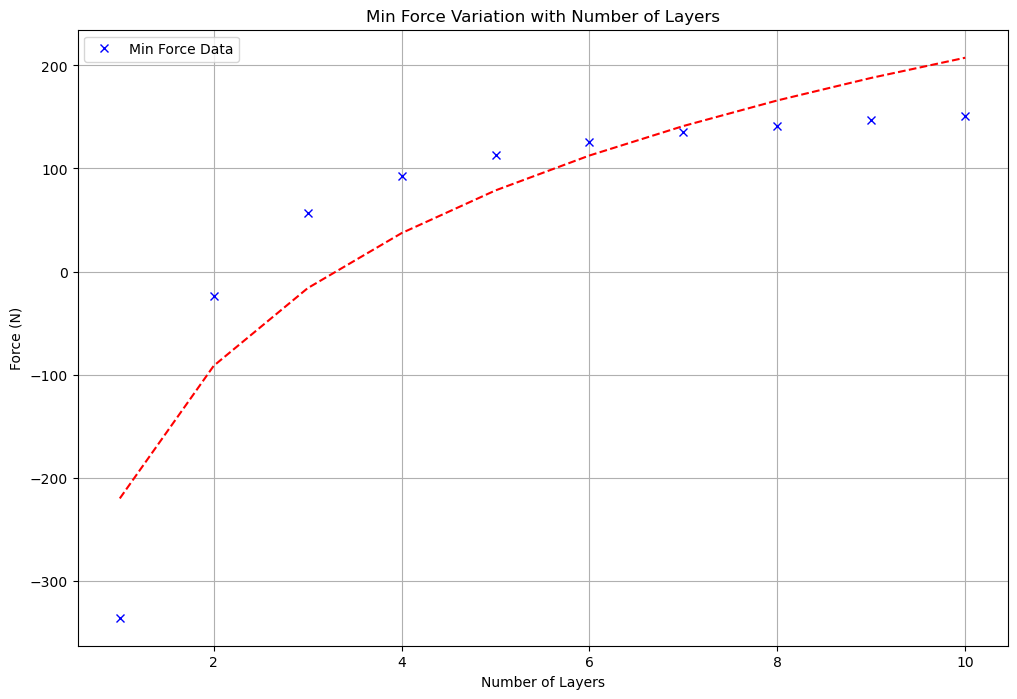

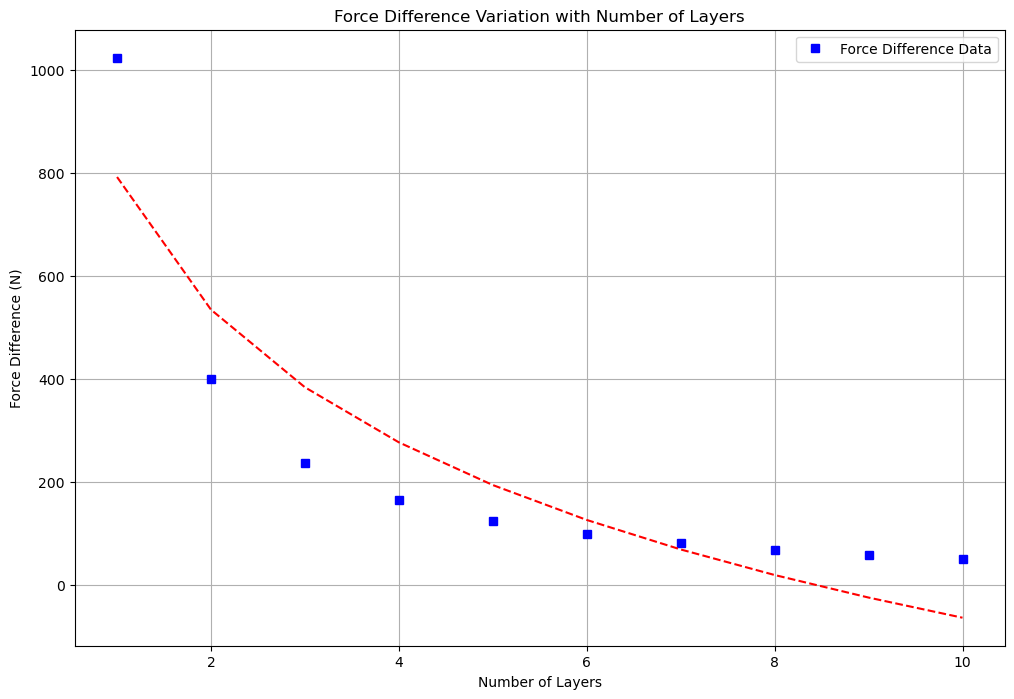

In [7]:
max_force = np.max(F, axis=1)
min_force = np.min(F, axis=1)
diff_force = max_force - min_force

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), max_force, 'bo', label='Max Force Data')
plt.xlabel('Number of Layers')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

# 로그 함수 형태의 추세선 계산
x = np.array(range(1, 11))
log_trend = np.polyfit(np.log(x), max_force, deg=1)
log_trend_line = log_trend[1] + log_trend[0] * np.log(x)
plt.plot(x, log_trend_line, 'r--', label=f'Log Trend: {log_trend[0]:.2f} * log(x) + {log_trend[1]:.2f}')

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), min_force, 'bx', label='Min Force Data')
plt.xlabel('Number of Layers')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

# 로그 함수 형태의 추세선 계산
log_trend = np.polyfit(np.log(x), min_force, deg=1)
log_trend_line = log_trend[1] + log_trend[0] * np.log(x)
plt.plot(x, log_trend_line, 'r--', label=f'Log Trend: {log_trend[0]:.2f} * log(x) + {log_trend[1]:.2f}')

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), diff_force, 'bs', label='Force Difference Data')
plt.xlabel('Number of Layers')
plt.ylabel('Force Difference (N)')
plt.legend()
plt.grid(True)

# 로그 함수 형태의 추세선 계산
log_trend = np.polyfit(np.log(x), diff_force, deg=1)
log_trend_line = log_trend[1] + log_trend[0] * np.log(x)
plt.plot(x, log_trend_line, 'r--', label=f'Log Trend: {log_trend[0]:.2f} * log(x) + {log_trend[1]:.2f}')

# 그래프 제목 설정
plt.figure(1)
plt.title('Max Force Variation with Number of Layers')
plt.figure(2)
plt.title('Min Force Variation with Number of Layers')
plt.figure(3)
plt.title('Force Difference Variation with Number of Layers')

# 그래프 표시
plt.show()


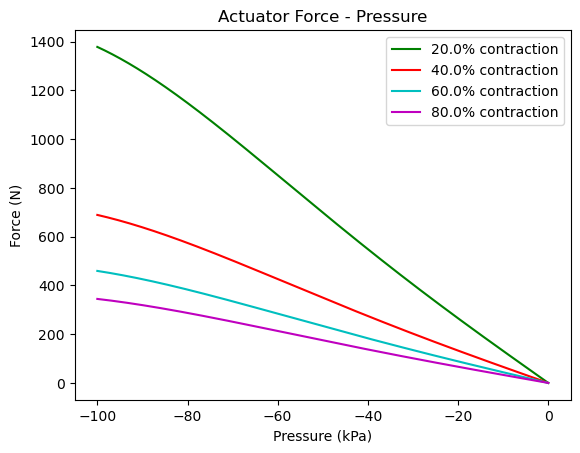

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 초기값 설정
theta = np.linspace(np.pi/180*60, 0, 1000)  # 각도 범위
initialheight = 140.4*10**-3
initialangle = np.pi/3
n = 5
h = 24*10**-3
D = 27*10**-3
d = 7*10**-3
s = 3.4*10**-3
R = 20.787*10**-3
L0 = h/np.sin(initialangle)
q = 1/2*L0*np.cos(initialangle)

# 함수 정의
L = L0 * np.sin(theta)
L_t = (n * L + (n + 1) * s)
dL = L0 * np.cos(theta)
dL_t = n * dL
V = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.sin(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * np.cos(theta) * np.sin(theta) + 2 * (n - 1) * (1 + 2 ** 0.5) * R ** 2 * s  ## 액추에이터 전체 부피
dV = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.cos(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * (np.cos(theta) ** 2 - np.sin(theta) ** 2)

# 압력과 힘 배열 선언
P = np.linspace(-100 * 10 ** 3, 0, 1000)  # 압력 값 (Pa)

# 수축률 설정
contraction_rates = [0, 0.2, 0.4, 0.6, 0.8]  # 수축률

# 힘-압력 그래프 그리기
colors = ['b', 'g', 'r', 'c', 'm']
for rate, color in zip(contraction_rates, colors):
    L_rate = rate * L[0]  # 계열에 대한 L 값
    L_t_rate = (n * L_rate + (n + 1) * s)
    dL_t_rate = n * L_rate

    # L_rate가 0이 아닌 경우에만 힘 계산
    if L_rate != 0:
        F = -P * dV / dL_t_rate  # 힘 계산
        plt.plot(P / 10 ** 3, F, '-', color=color, label=f'{rate * 100}% contraction')

# 축 레이블 및 범례 설정
plt.xlabel('Pressure (kPa)')
plt.ylabel('Force (N)')
plt.legend()

# 그래프 제목 설정
plt.title('Actuator Force - Pressure')

# 그래프 표시
plt.show()


# 첫 실험 데이터 그래프, 이론 그래프와 비교

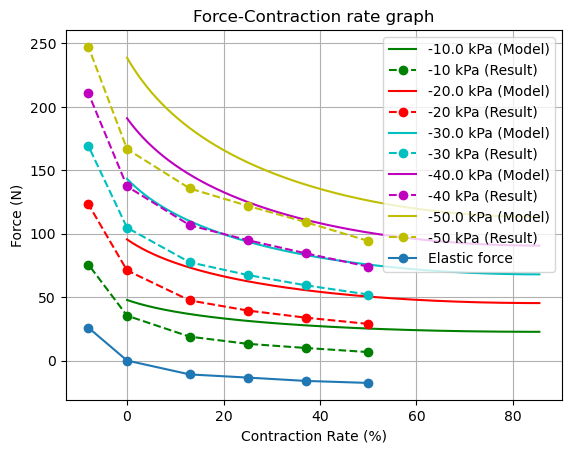

In [11]:
import numpy as np
import matplotlib.pyplot as plt

length = [1.08, 1, 0.87, 0.75, 0.63, 0.5]
force_0kPa = [25.872, 0, -10.9466, -13.426, -16.0524, -17.64]
force_10kPa = [75.6462, 35.378, 18.816, 13.1712, 9.9274, 6.6836]
force_20kPa = [123.1566, 71.0402, 47.3928, 39.4254, 33.8198, 28.8904]
force_30kPa = [169.0402, 104.7228, 77.4494, 67.4436, 59.339, 52.0576]
force_40kPa = [210.5922, 137.298, 106.673, 94.9032, 84.5642, 74.0292]
force_50kPa = [247.2344, 166.6882, 135.6418, 121.9904, 109.1426, 94.2858]

# 데이터 역순으로 정렬
length = length[::-1]
force_0kPa = force_0kPa[::-1]
force_10kPa = force_10kPa[::-1]
force_20kPa = force_20kPa[::-1]
force_30kPa = force_30kPa[::-1]
force_40kPa = force_40kPa[::-1]
force_50kPa = force_50kPa[::-1]

# 길이를 수축률로 변환
strain = [(1 - l) * 100 for l in length]

# 초기값 설정
theta = np.linspace(np.pi/180*60, 0, 1000)
initialheight = 137*10**-3
initialangle = np.pi/3
n = 5
h = 24*10**-3
D = 27*10**-3
d = 7*10**-3
s = 3.4*10**-3
R = 20.787*10**-3
L0 = h/np.sin(initialangle)
q = 1/2*L0*np.cos(initialangle)

# 함수 정의
L = L0 * np.sin(theta)
L_t = (n * L + (n + 1) * s)
dL = L0 * np.cos(theta)
dL_t = n * dL
V = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.sin(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * np.cos(theta) * np.sin(theta) + 2 * (n - 1) * (1 + 2 ** 0.5) * R ** 2 * s
dV = 2 * n * (1 + 2 ** 0.5) * D ** 2 * L0 * np.cos(theta) - 2/3 * n * (2 * D + d + q) * L0 ** 2 * (np.cos(theta) ** 2 - np.sin(theta) ** 2)

# 압력과 힘 배열 선언
P = [0] * 11
F = [0] * 11

# 압력과 힘 계산
for i in range(0, 11):
    P[i] = -10 * i * 10 ** 3  # 압력 값 (Pa)
    F[i] = -P[i] * dV / dL_t

# 실험값의 그래프를 점선과 마커로 표시
force_exp = [force_0kPa, force_10kPa, force_20kPa, force_30kPa, force_40kPa, force_50kPa]
contraction_rate = (1 - L_t / L_t[0]) * 100
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:brown', 'tab:pink', 'tab:olive']
linestyles = ['-', '--', '--', '--', '--', '--']
markers = ['o', 'o', 'o', 'o', 'o', 'o']
for i in range(1, 6):
    plt.plot(contraction_rate, F[i], '-', color=colors[i], label=str(P[i] / 10 ** 3) + ' kPa (Model)')
    plt.plot(strain, force_exp[i], linestyle=linestyles[i], marker=markers[i], color=colors[i], label=str(-i * 10) + ' kPa (Result)')

plt.plot(strain, force_0kPa, marker='o', label='Elastic force')

plt.xlabel('Contraction Rate (%)')
plt.ylabel('Force (N)')
plt.title('Force-Contraction rate graph')
plt.grid(True)
plt.legend()
plt.show()
